In [ ]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# !gdown 1j9HuhBJRiwo4z320Sep0wavNHh3ShFrY
# !gdown 12-E0OtJ_zrWByYAG7fMwJ-jx7FWejJw5
# !gdown 1een3UHW85X9rFVhuGVZF7lZaaPlnC0xq
# !gdown 1f_ar4rCtAp7Bh6zY41w5b9VrIm9EflOK
# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
import pandas as pd
df = pd.read_csv("train.csv")

<ipython-input-5-1ae335a4f3c9>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("train.csv")


In [ ]:
print("Shape of the Dataset:",df.shape)

Shape of the Dataset: (1017209, 9)


In [ ]:
df.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
store = pd.read_csv("store.csv")
print("Shape of the Dataset:",store.shape)

Shape of the Dataset: (1115, 10)


In [ ]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
df_new = df.merge(store,on=["Store"], how="inner")
print(df_new.shape)

(1017209, 18)


In [ ]:
print("Distinct number of Stores :", len(df_new["Store"].unique()))
print("Distinct number of Days :", len(df_new["Date"].unique()))
print("Average daily sales of all stores : ",round(df_new["Sales"].mean(),2))

Distinct number of Stores : 1115
Distinct number of Days : 942
Average daily sales of all stores :  5773.82


In [ ]:
df_new.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [ ]:
df_new["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: DayOfWeek, dtype: int64

In [ ]:
df_new['Date'] = pd.to_datetime(df_new['Date'], infer_datetime_format=True)
df_new["Month"] = df_new["Date"].dt.month
df_new["Quarter"] = df_new["Date"].dt.quarter
df_new["Year"] = df_new["Date"].dt.year
df_new["Day"] = df_new["Date"].dt.day
df_new["Week"] = df_new["Date"].dt.week

<ipython-input-14-ec387f173234>:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_new["Week"] = df_new["Date"].dt.week


In [ ]:
df_new["Season"] = np.where(df_new["Month"].isin([3,4,5]),"Spring",np.where(df_new["Month"].isin([6,7,8]),"Summer",np.where(df_new["Month"].isin([9,10,11]),"Fall",np.where(df_new["Month"].isin([12,1,2]),"Winter","None"))))

In [ ]:
print(df_new[["Date","Year","Month","Day","Week","Quarter","Season"]].head())

        Date  Year  Month  Day  Week  Quarter  Season
0 2015-07-31  2015      7   31    31        3  Summer
1 2015-07-30  2015      7   30    31        3  Summer
2 2015-07-29  2015      7   29    31        3  Summer
3 2015-07-28  2015      7   28    31        3  Summer
4 2015-07-27  2015      7   27    31        3  Summer


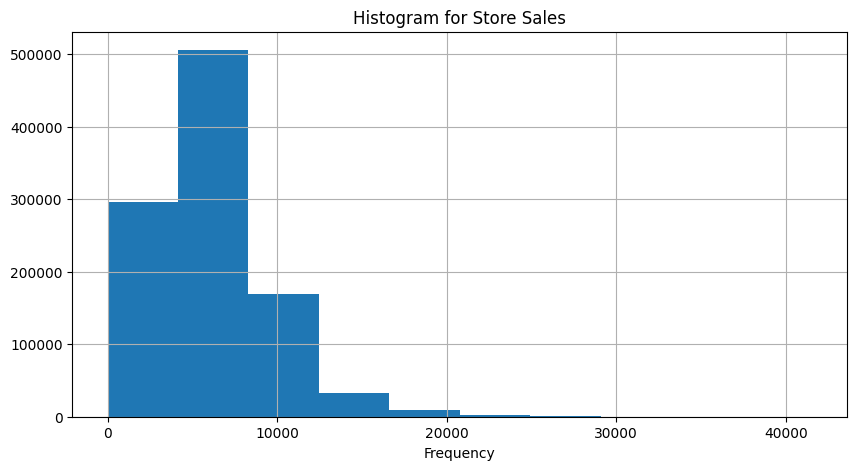

In [ ]:
#Create a histogram to study the Daily Sales for the stores
plt.figure(figsize=(10,5))
plt.grid()
plt.hist(df_new["Sales"])
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

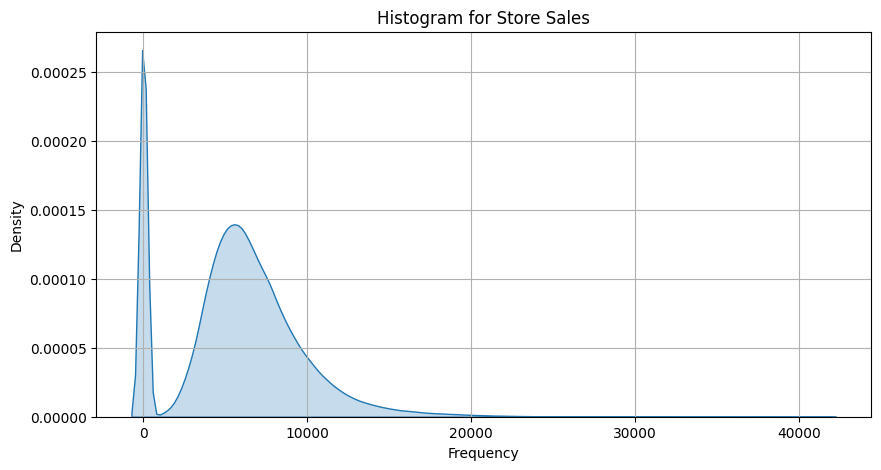

In [ ]:
plt.figure(figsize=(10,5))
plt.grid()
sns.kdeplot(df_new["Sales"], fill=True)
plt.title("Histogram for Store Sales")
plt.xlabel("bins")
plt.xlabel("Frequency")
plt.show()

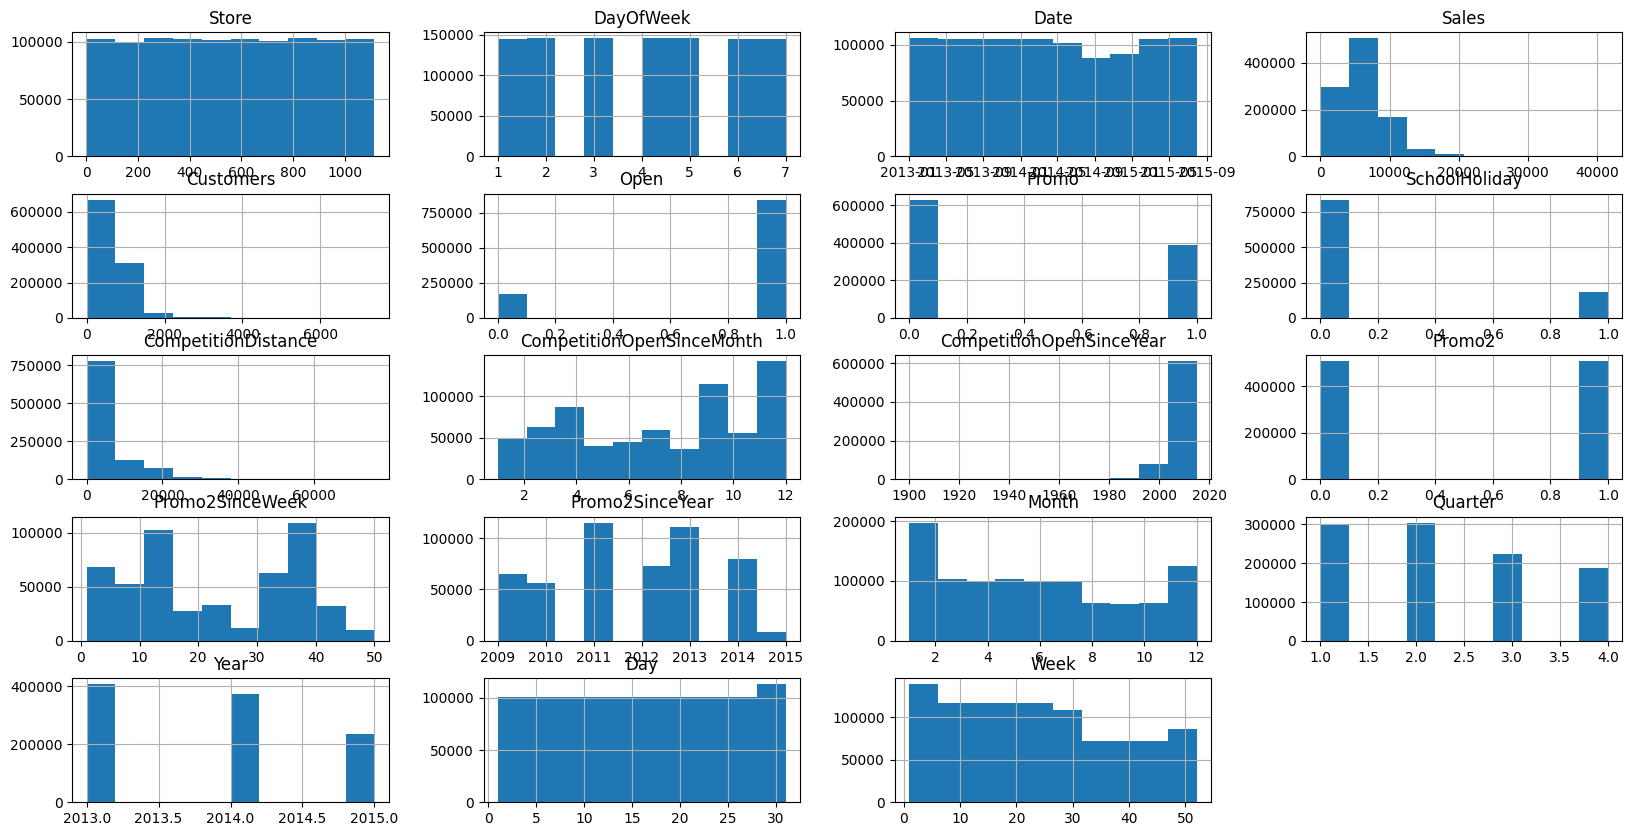

In [ ]:
df_new.hist(figsize=(20,10))
plt.show()

In [ ]:
for i in df_new.columns:
    print("Missing values in ",i, "is -",  "    "  ,df_new[i].isnull().sum()/df_new.shape[0] * 100)

Missing values in  Store is -      0.0
Missing values in  DayOfWeek is -      0.0
Missing values in  Date is -      0.0
Missing values in  Sales is -      0.0
Missing values in  Customers is -      0.0
Missing values in  Open is -      0.0
Missing values in  Promo is -      0.0
Missing values in  StateHoliday is -      0.0
Missing values in  SchoolHoliday is -      0.0
Missing values in  StoreType is -      0.0
Missing values in  Assortment is -      0.0
Missing values in  CompetitionDistance is -      0.25973030124586
Missing values in  CompetitionOpenSinceMonth is -      31.787764363075826
Missing values in  CompetitionOpenSinceYear is -      31.787764363075826
Missing values in  Promo2 is -      0.0
Missing values in  Promo2SinceWeek is -      49.94362023930186
Missing values in  Promo2SinceYear is -      49.94362023930186
Missing values in  PromoInterval is -      49.94362023930186
Missing values in  Month is -      0.0
Missing values in  Quarter is -      0.0
Missing values in  Ye

In [ ]:
df_new["CompetitionDistance"]=df_new["CompetitionDistance"].fillna(df_new["CompetitionDistance"].mode()[0])

In [ ]:
df_new["CompetitionDistance"].isnull().sum()/df_new.shape[0] * 100

0.0

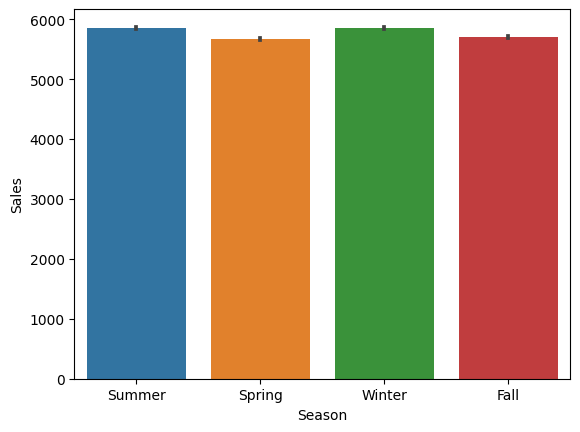

In [ ]:
#Create the bar plot for Average Sales across different Seasons
ax = sns.barplot(x="Season", y="Sales", data=df_new)

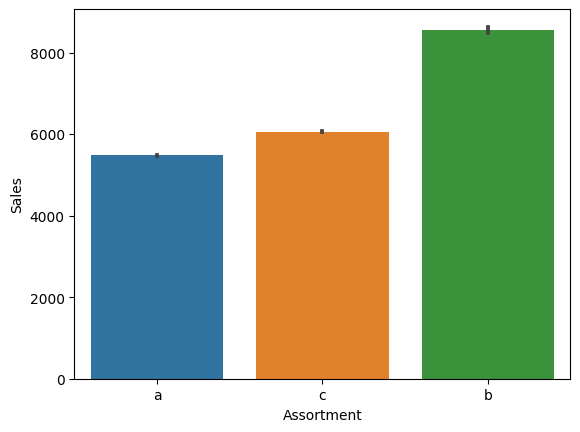

In [ ]:
#Create the bar plot for Average Sales across different Assortments
ax = sns.barplot(x="Assortment", y="Sales", data=df_new)

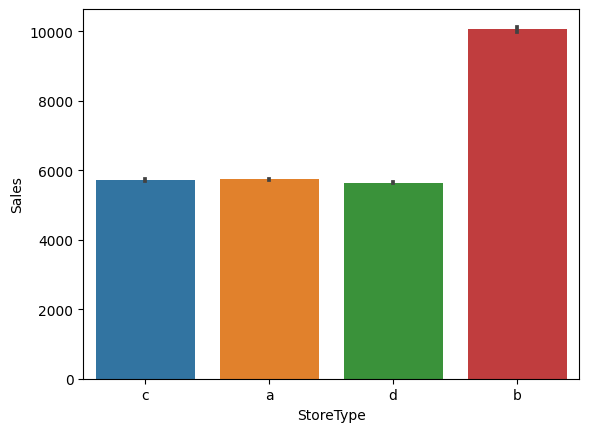

In [ ]:
#Create the bar plot for Average Sales across different Store Types
ax = sns.barplot(x="StoreType", y="Sales", data=df_new)

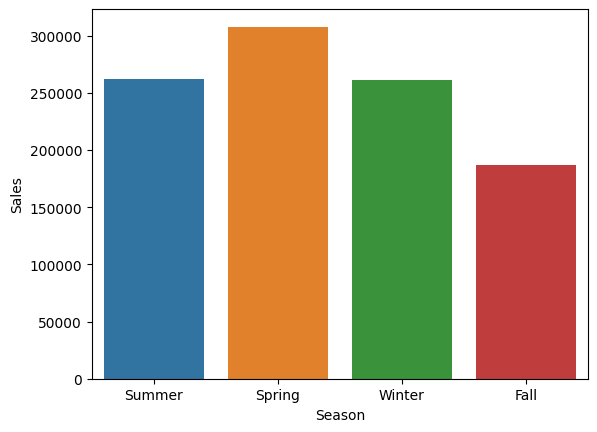

In [ ]:
ax = sns.barplot(x="Season", y="Sales", data=df_new,estimator=np.size)

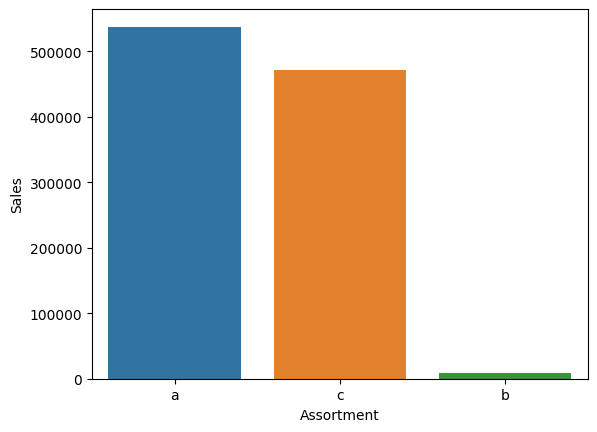

In [ ]:
ax = sns.barplot(x="Assortment", y="Sales", data=df_new,estimator=np.size)

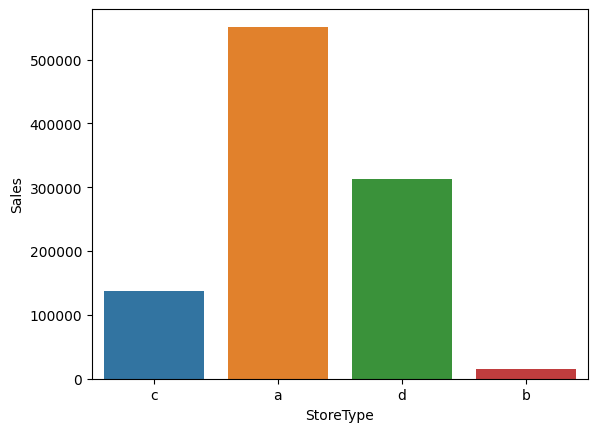

In [ ]:
ax = sns.barplot(x="StoreType", y="Sales", data=df_new,estimator=np.size)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
target = ["Sales"]

In [ ]:
numeric_columns = ["Customers","Open","Promo","Promo2","StateHoliday","SchoolHoliday",
                   "CompetitionDistance"]
categorical_columns = ["DayOfWeek","Quarter","Month","Year",
                       "StoreType","Assortment","Season"]

In [ ]:
#Define a function that will intake the raw dataframe
def create_ohe(df, col):
    le = LabelEncoder()
    a=le.fit_transform(df_new[col]).reshape(-1,1)
    ohe = OneHotEncoder(sparse=False)
    column_names = [col+ "_"+ str(i) for i in le.classes_]
    return(pd.DataFrame(ohe.fit_transform(a),columns =column_names))

In [ ]:
#Since the above function converts the column, one at a time
#We create a loop to create the final dataset with all features
temp = df_new[numeric_columns]
for column in categorical_columns:
    temp_df = create_ohe(df_new,column)
    temp = pd.concat([temp,temp_df],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

In [ ]:
print("Shape of Data:",temp.shape)
print("Distinct Datatypes:",temp.dtypes.unique())

Shape of Data: (1017209, 44)
Distinct Datatypes: [dtype('int64') dtype('O') dtype('float64')]


In [ ]:
print(temp.columns[temp.dtypes=="object"])

Index(['StateHoliday'], dtype='object')


In [ ]:
temp["StateHoliday"].unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [ ]:
temp["StateHoliday"]= np.where(temp["StateHoliday"]== '0',0,1)
#One last check of the data type
temp.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(temp,df_new[target],test_size=0.2,random_state=2018)

In [ ]:
#Further divide training dataset into train and validation dataset with an 90:10 split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.1,random_state=2018)

In [ ]:
#Check the sizes of all newly created datasets
print("Shape of x_train:",x_train.shape)
print("Shape of x_val:",x_val.shape)
print("Shape of x_test:",x_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_val:",y_val.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train: (732390, 44)
Shape of x_val: (81377, 44)
Shape of x_test: (203442, 44)
Shape of y_train: (732390, 1)
Shape of y_val: (81377, 1)
Shape of y_test: (203442, 1)


In [ ]:
#calculate the average score of the train dataset
mean_sales = y_train.mean()
print("Average Sales :",mean_sales)

Average Sales : Sales    5773.099997
dtype: float64


In [ ]:
#Calculate the Mean Absolute Error on the test dataset
print("MAE for Test Data:",abs(y_test - mean_sales).mean()[0])

MAE for Test Data: 2883.587604303127


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
#The input_dim =44, since the width of the training data=44 (refer data engg section)
model.add(Dense(1,activation = "linear"))

In [ ]:
#Configure the model
model.compile(optimizer='adam',loss="mean_absolute_error", metrics=["mean_absolute_error"])

In [ ]:
#Train the model
model.fit(x_train.values,y_train.values, validation_data=(x_val,y_val),epochs=10,batch_size=64)

Epoch 1/10
11444/11444 [==============================] - 27s 2ms/step - loss: 939.5317 - mean_absolute_error: 939.5317 - val_loss: 807.8485 - val_mean_absolute_error: 807.8485
Epoch 2/10
11444/11444 [==============================] - 25s 2ms/step - loss: 769.3179 - mean_absolute_error: 769.3179 - val_loss: 741.0620 - val_mean_absolute_error: 741.0620
Epoch 3/10
11444/11444 [==============================] - 25s 2ms/step - loss: 731.9913 - mean_absolute_error: 731.9913 - val_loss: 717.0719 - val_mean_absolute_error: 717.0719
Epoch 4/10
11444/11444 [==============================] - 28s 2ms/step - loss: 716.3838 - mean_absolute_error: 716.3838 - val_loss: 704.0390 - val_mean_absolute_error: 704.0390
Epoch 5/10
11444/11444 [==============================] - 25s 2ms/step - loss: 705.8710 - mean_absolute_error: 705.8710 - val_loss: 737.2330 - val_mean_absolute_error: 737.2330
Epoch 6/10
11444/11444 [==============================] - 25s 2ms/step - loss: 700.2354 - mean_absolute_error: 700.

In [ ]:
#Use the model's evaluate method to predict and evaluate the test datasets
result = model.evaluate(x_test.values,y_test.values)

#Print the results
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

6358/6358 [==============================] - 11s 2ms/step - loss: 725.7692 - mean_absolute_error: 725.7692
Metric  loss : 725.77
Metric  mean_absolute_error : 725.77


In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
history = model.fit(x_train,y_train, validation_data=(x_val,
y_val),epochs=10,batch_size=64)
#result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/10
11444/11444 [==============================] - 37s 3ms/step - loss: 1709628.5000 - mean_absolute_error: 850.5504 - val_loss: 1152505.7500 - val_mean_absolute_error: 724.4066
Epoch 2/10
11444/11444 [==============================] - 38s 3ms/step - loss: 1152452.3750 - mean_absolute_error: 720.2786 - val_loss: 1045637.9375 - val_mean_absolute_error: 681.6171
Epoch 3/10
11444/11444 [==============================] - 39s 3ms/step - loss: 1089146.0000 - mean_absolute_error: 700.1522 - val_loss: 1050608.5000 - val_mean_absolute_error: 693.7153
Epoch 4/10
11444/11444 [==============================] - 37s 3ms/step - loss: 1058729.6250 - mean_absolute_error: 690.3188 - val_loss: 1078952.7500 - val_mean_absolute_error: 699.6828
Epoch 5/10
11444/11444 [==============================] - 38s 3ms/step - loss: 1029084.4375 - mean_absolute_error: 680.7039 - val_loss: 1132078.8750 - val_mean_absolute_error: 714.6387
Epoch 6/10
11444/11444 [==============================] - 41s 4ms/step - lo

In [ ]:
model = Sequential()
model.add(Dense(150,input_dim = 44,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(150,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 59s 5ms/step - loss: 1713833.2500 - mean_absolute_error: 852.4221 - val_loss: 1136232.8750 - val_mean_absolute_error: 714.4559
Epoch 2/15
11444/11444 [==============================] - 54s 5ms/step - loss: 1178346.2500 - mean_absolute_error: 726.3823 - val_loss: 1086562.8750 - val_mean_absolute_error: 699.6398
Epoch 3/15
11444/11444 [==============================] - 53s 5ms/step - loss: 1099042.1250 - mean_absolute_error: 701.3535 - val_loss: 994337.8125 - val_mean_absolute_error: 675.0099
Epoch 4/15
11444/11444 [==============================] - 51s 4ms/step - loss: 1063646.7500 - mean_absolute_error: 690.7056 - val_loss: 991557.1250 - val_mean_absolute_error: 670.0575
Epoch 5/15
11444/11444 [==============================] - 54s 5ms/step - loss: 1032688.8750 - mean_absolute_error: 680.8018 - val_loss: 1025959.3750 - val_mean_absolute_error: 677.4783
Epoch 6/15
11444/11444 [==============================] - 52s 5ms/step - loss

In [ ]:
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64)
result = model.evaluate(x_test,y_test)
for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 65s 6ms/step - loss: 1661958.3750 - mean_absolute_error: 844.7752 - val_loss: 1241705.2500 - val_mean_absolute_error: 750.1071
Epoch 2/15
11444/11444 [==============================] - 69s 6ms/step - loss: 1154152.6250 - mean_absolute_error: 725.4434 - val_loss: 1035292.3750 - val_mean_absolute_error: 690.5980
Epoch 3/15
11444/11444 [==============================] - 69s 6ms/step - loss: 1086789.1250 - mean_absolute_error: 703.5355 - val_loss: 996948.8125 - val_mean_absolute_error: 677.4595
Epoch 4/15
11444/11444 [==============================] - 70s 6ms/step - loss: 1059637.7500 - mean_absolute_error: 694.6931 - val_loss: 1016597.3125 - val_mean_absolute_error: 688.2859
Epoch 5/15
11444/11444 [==============================] - 69s 6ms/step - loss: 1036618.5625 - mean_absolute_error: 687.2775 - val_loss: 974969.1250 - val_mean_absolute_error: 673.7333
Epoch 6/15
11444/11444 [==============================] - 76s 7ms/step - loss

In [ ]:
from keras.callbacks import History
history = History()
model = Sequential()
model.add(Dense(350,input_dim = 44,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(350,activation="relu"))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer='adam',loss="mean_squared_error",metrics=["mean_absolute_error"])
model.fit(x_train,y_train, validation_data=(x_val,y_val),
epochs=15,batch_size=64,callbacks=[history])
result = model.evaluate(x_test,y_test)

for i in range(len(model.metrics_names)):
    print("Metric ",model.metrics_names[i],":",str(round(result[i],2)))

Epoch 1/15
11444/11444 [==============================] - 145s 13ms/step - loss: 1627549.2500 - mean_absolute_error: 839.2139 - val_loss: 1195531.7500 - val_mean_absolute_error: 740.8549
Epoch 2/15
11444/11444 [==============================] - 150s 13ms/step - loss: 1177608.3750 - mean_absolute_error: 726.7758 - val_loss: 1159180.6250 - val_mean_absolute_error: 719.8177
Epoch 3/15
11444/11444 [==============================] - 146s 13ms/step - loss: 1101750.8750 - mean_absolute_error: 701.6821 - val_loss: 1004612.1875 - val_mean_absolute_error: 681.0776
Epoch 4/15
11444/11444 [==============================] - 145s 13ms/step - loss: 1062664.2500 - mean_absolute_error: 689.9620 - val_loss: 994736.3125 - val_mean_absolute_error: 673.6922
Epoch 5/15
11444/11444 [==============================] - 144s 13ms/step - loss: 1040402.4375 - mean_absolute_error: 682.9588 - val_loss: 1177195.0000 - val_mean_absolute_error: 720.0643
Epoch 6/15
11444/11444 [==============================] - 145s 13m

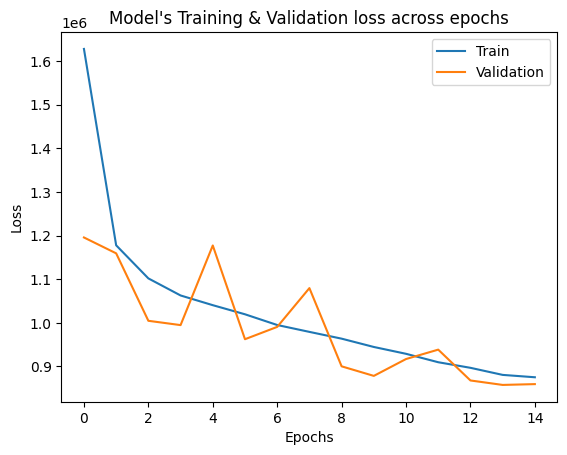

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model's Training & Validation loss across epochs")
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
#Manually predicting from the model, instead of using model's evaluate function
y_test["Prediction"] = model.predict(x_test)
y_test.columns = ["Actual Sales","Predicted Sales"]
print(y_test.head(10))

6358/6358 [==============================] - 23s 4ms/step
        Actual Sales  Predicted Sales
115563             0        -0.222091
832654             0        -0.222091
769112          2933      2978.945801
350588          8602      7266.452637
141556          6975      6395.230469
84435           9239      9011.111328
53018              0        -0.222091
262419             0        -0.222091
702267          5885      5237.320312
981431             0        -0.222091


In [ ]:
#Manually predicting from the model, instead of using model's evaluate function
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("MSE :",mean_squared_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))
print("MAE :",mean_absolute_error(y_test["Actual Sales"].values,y_test["Predicted Sales"].values))

MSE : 860302.833828449
MAE : 618.7251394011269


In [ ]:
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# 데이터 로딩 및 전처리 (기존 코드와 동일)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final Mean Squared Error: 571023.2256110471
Final Mean Absolute Error: 481.10806247744347


In [ ]:
# 선형 회귀 모델
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

In [ ]:
# 그래디언트 부스팅 모델
gradient_boosting = GradientBoostingRegressor()
gradient_boosting.fit(x_train, y_train)

In [ ]:
# 각 모델의 예측
linear_reg_predictions = linear_reg.predict(x_test)
gradient_boosting_predictions = gradient_boosting.predict(x_test)

In [ ]:

# 예측 결과를 입력으로 사용하여 메타 모델 (선형 회귀) 학습
meta_model_X = np.column_stack((linear_reg_predictions, gradient_boosting_predictions))
meta_model_y = y_test

meta_model = LinearRegression()
meta_model.fit(meta_model_X, meta_model_y)

In [ ]:
# 각 모델의 예측을 조합하여 최종 예측을 수행
final_predictions = meta_model.predict(meta_model_X)

In [ ]:
# 최종 모델의 성능 평가
final_mse = mean_squared_error(meta_model_y, final_predictions)
final_mae = mean_absolute_error(meta_model_y, final_predictions)
print("Final Mean Squared Error:", final_mse)
print("Final Mean Absolute Error:", final_mae)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

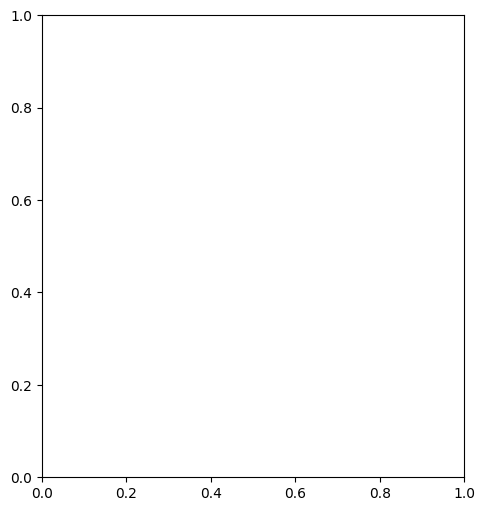

In [ ]:
# # 선형 회귀 모델
# linear_reg = LinearRegression()
# linear_reg.fit(x_train, y_train)

# # 그래디언트 부스팅 모델
# gradient_boosting = GradientBoostingRegressor()
# gradient_boosting.fit(x_train, y_train)

# # 각 모델의 예측
# linear_reg_predictions = linear_reg.predict(x_test)
# gradient_boosting_predictions = gradient_boosting.predict(x_test)

# # 예측 결과를 입력으로 사용하여 메타 모델 (선형 회귀) 학습
# meta_model_X = np.column_stack((linear_reg_predictions, gradient_boosting_predictions))
# meta_model_y = y_test

# y_test = np.array(y_test).ravel()

# # 시각화 그래프
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.scatter(y_test, linear_reg_predictions, c='blue')
# plt.xlabel("Actual Sales")
# plt.ylabel("Linear Regression Predictions")
# plt.title("Linear Regression Model Predictions")

# plt.subplot(1, 2, 2)
# plt.scatter(y_test, gradient_boosting_predictions, c='green')
# plt.xlabel("Actual Sales")
# plt.ylabel("Gradient Boosting Predictions")
# plt.title("Gradient Boosting Model Predictions")

# plt.tight_layout()
# plt.show()
